# MEDICAL CLAIMS DATA ANALYSIS FOR COST REDUCTION

Healthcare costs continue to rise at an unsustainable  pace, placing a burden on individuals, businesses, and governments alike. Understanding the major forces driving these costs is crucial for developing effective cost-containment strategies.  Key factors include administrative expenses,  hospital costs, the prevalence of chronic diseases, labor costs, and rapidly rising  prescription drug prices.

This assessment will analyze medical claims data to pinpoint the most prominent cost drivers within this context. Furthermore, I will examine how costs might vary across locations, insurance providers, and different medical conditions. This analysis aims to generate  actionable insights to inform  targeted cost reduction efforts.

In [1]:
# We start by importing necesessary python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data preparation

* Data Import and Cleaning

In [2]:
claim = pd.read_csv(r'C:\Users\innoc\Downloads\claim.csv')
claim.head()

,id,createdAt,updatedAt,scheme,patientId,medicationCode,admissionDate,dischargeDate,medicationName,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
0,66dc1204-4659-4a11-9caf-8d73e606f2c8,2024-04-23 00:50:53.250608,2024-04-23 00:50:53.276233,MUTUELLE,ab4dbfa7-9d5d-4341-b3b6-29a4c4b2edf1,32138,2023-10-01 14:30:46.964,2024-03-16 22:54:55.463,HEMORRHOIDECTOMY,ICD-J05AB01003,CPT-42242000FQZ445,75,2625,1716,909
1,71bde428-ef0a-4d42-bff1-473b751fb40e,2024-04-23 00:52:19.464756,2024-04-23 00:52:19.479903,MUTUELLE,5e11bb86-bdf5-460e-96f5-ac1ab31f3bd1,J01MA03001,2024-03-25 20:37:47.191,2024-04-12 20:39:00.497,CIPROFLOXACIN 500MG TABLET,ICD-J05AR01002,CPT-42242000FQZ429,73,521585,222971,298614
2,53ed2514-fad6-4925-abd2-605e272277e7,2024-04-23 00:50:53.317807,2024-04-23 00:50:53.348851,MUTUELLE,d1a7c6dc-cab5-4700-92b7-b406fddbdca4,M01AB05005,2023-08-13 22:05:54.853,2023-12-23 02:15:25.413,DICLOFENAC 75MG/ML INJECTION,ICD-J01XX04001,CPT-42242000FQZ419,100,559500,294490,265010
3,ce6f97e0-7179-4f13-bd59-2e91cbd53442,2024-04-23 00:50:53.377835,2024-04-23 00:50:53.406237,MUTUELLE,f095637f-2192-4a71-aa37-2f3cdbdd3790,A03F01001,2024-03-21 11:19:42.498,2024-04-16 09:17:25.318,METOCLOPRAMIDE 10MG TABLET,ICD-J01XC01001,CPT-42242000FQZ386,86,672520,672469,51
4,a3f82d42-a7f8-4421-bf11-35a53b994fde,2024-04-23 00:51:19.294958,2024-04-23 00:51:19.306367,RAMA,2f5014a3-b453-4ecf-adfb-fdd00292b90a,37438,2023-11-27 21:14:51.064,2024-01-28 18:58:20.373,SCROTUM EXCISION,ICD-J04AM05002,CPT-42242000FQZ419,50,303500,54816,248684


In [3]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937436 entries, 0 to 1937435
Data columns (total 15 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   createdAt       object
 2   updatedAt       object
 3   scheme          object
 4   patientId       object
 5   medicationCode  object
 6   admissionDate   object
 7   dischargeDate   object
 8   medicationName  object
 9   diagnosisCode   object
 10  procedureCode   object
 11  quantity        int64 
 12  billedAmount    int64 
 13  verifiedAmount  int64 
 14  paidAmount      int64 
dtypes: int64(4), object(11)
memory usage: 221.7+ MB


In [4]:
# Find null values
claim.isnull().sum()

id                 0
createdAt          0
updatedAt          0
scheme             0
patientId         86
medicationCode     0
admissionDate      0
dischargeDate      0
medicationName     0
diagnosisCode      0
procedureCode      0
quantity           0
billedAmount       0
verifiedAmount     0
paidAmount         0
dtype: int64

In [5]:
claim.shape

(1937436, 15)

In [6]:
# we have 86 rows with missing data and almost 1.2 million entries.
# The technique i chose is dropping these rows.

claim = claim.dropna(subset=['patientId'])
claim.shape

(1937350, 15)

In [7]:
# We can see the shape of the claim dataset has reduced, let's confirm
claim.isnull().sum()

id                0
createdAt         0
updatedAt         0
scheme            0
patientId         0
medicationCode    0
admissionDate     0
dischargeDate     0
medicationName    0
diagnosisCode     0
procedureCode     0
quantity          0
billedAmount      0
verifiedAmount    0
paidAmount        0
dtype: int64

In [8]:
demo = pd.read_csv(r'C:\Users\innoc\Downloads\demography.csv')
demo.head()

,id,createdAt,updatedAt,firstName,lastName,gender,yearOfBirth,location,facilityName
0,9b2af029-7584-4229-8710-7335806c1440,2024-04-23 00:50:51.717305,2024-04-23 00:50:51.717305,Carolyn,Fritsch,FEMALE,1973,Lake Newell,Forttown
1,7feb5992-93e6-4b12-bf82-098e10f5291d,2024-04-23 00:50:51.879266,2024-04-23 00:50:51.879266,Fred,Heller,FEMALE,1982,Valerieworth,La Stamal
2,12c23628-57ab-414b-a2d0-15ce6f756db2,2024-04-23 00:50:52.001138,2024-04-23 00:50:52.001138,Ella,Rath,FEMALE,1913,Louton,Grand Mountnell
3,3bb1ebe6-583b-4abd-a764-fe765383814d,2024-04-23 00:50:52.116767,2024-04-23 00:50:52.116767,Erik,Jaskolski,FEMALE,1922,Lessiestad,Prince Statenor
4,9f4e6e70-8a2a-48b5-ba7d-b333a3174524,2024-04-23 00:50:52.244694,2024-04-23 00:50:52.244694,Flora,Crona,MALE,1917,Berwyn,Great Ponar


In [9]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38747 entries, 0 to 38746
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            38747 non-null  object
 1   createdAt     38747 non-null  object
 2   updatedAt     38747 non-null  object
 3   firstName     38747 non-null  object
 4   lastName      38747 non-null  object
 5   gender        38747 non-null  object
 6   yearOfBirth   38747 non-null  int64 
 7   location      38747 non-null  object
 8   facilityName  38747 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.7+ MB


In [10]:
combined = pd.read_csv(r'C:\Users\innoc\Downloads\demography_claim.csv')
combined.head()

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
0,f70c7cea-d533-48ff-999e-d8ae2dfbdb7d,Alberta,Gerhold,FEMALE,Nkridgegridgewood,RAMA,35641,OVARIECTOMIE,2024-02-12 04:56:20.699,2024-03-23 09:19:21.894,ICD-J05AE10001,CPT-42242000FQZ425,82,632220,453929,178291
1,51b5e30c-cf7c-463b-874c-35b935257049,Dorothy,Rice,MALE,Forttown,MUTUELLE,30631,HYDROCELECTOMY,2023-11-10 07:00:17.013,2024-02-20 01:02:53.296,ICD-J04AB02002,CPT-42242000FQZ400,60,590700,528066,62634
2,5819dcde-d9a9-4bba-9ce5-6eb92c0b9194,Brandy,Pollich,FEMALE,Port Birmills,RAMA,35641,OVARIECTOMIE,2023-07-16 00:22:32.556,2024-03-30 05:26:46.263,ICD-J04AM02002,CPT-42242000FQZ351,34,100980,73711,27269
3,026ec986-620b-41e5-9fc2-f9dc4d2247d2,Phyllis,Monahan,FEMALE,North Lusland With Bathdsor,RAMA,35641,OVARIECTOMIE,2023-05-21 00:24:43.016,2023-05-27 06:00:36.737,ICD-J01XB02001,CPT-42242000FQZ410,31,199330,48398,150932
4,17469904-7dd7-466d-9090-eba19a6f31dc,Daisy,Kuhic,FEMALE,Cetersrye,RAMA,35641,OVARIECTOMIE,2023-04-12 22:32:48.769,2023-09-09 15:52:50.782,ICD-J07BC01002,CPT-42242000FQZ359,100,888500,313717,574783


In [11]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937350 entries, 0 to 1937349
Data columns (total 16 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   firstName       object
 2   lastName        object
 3   gender          object
 4   facilityName    object
 5   scheme          object
 6   medicationCode  object
 7   medicationName  object
 8   admissionDate   object
 9   dischargeDate   object
 10  diagnosisCode   object
 11  procedureCode   object
 12  quantity        int64 
 13  billedAmount    int64 
 14  verifiedAmount  int64 
 15  paidAmount      int64 
dtypes: int64(4), object(12)
memory usage: 236.5+ MB


In [13]:
# Most columns are 'object' (likely strings), including dates. We'll convert these for efficient analysis.

def convert_to_datetime(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S.%f')
    except ValueError:
        return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S')

# Conversion targeting specific datasets and columns
for df in [claim, combined]:
    df['admissionDate'] = df['admissionDate'].apply(convert_to_datetime) 
    df['dischargeDate'] = df['dischargeDate'].apply(convert_to_datetime)

In [15]:
#Let's verify if the time has changed

combined[['admissionDate','dischargeDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937350 entries, 0 to 1937349
Data columns (total 2 columns):
 #   Column         Dtype         
---  ------         -----         
 0   admissionDate  datetime64[ns]
 1   dischargeDate  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 29.6 MB


This confirms that our datetime columns have changed

* Initial observations indicate approximately 1.2 million entries with some missing data. Missing patient IDs were removed to ensure data quality."

* Date columns were converted for accuracy in case of need

## Exploratory Data Analysis (EDA)

* Understanding Cost Distributions (For the section with histograms/summary statistics)
* Investigating Healthcare Scheme Balance
* Location and Facility Relationships

In [16]:
# Let us check for the main healthcare schemes and how they are distributed

for df in [claim, combined]:
    print(df['scheme'].value_counts())

scheme
MUTUELLE    969039
RAMA        968311
Name: count, dtype: int64
scheme
MUTUELLE    969039
RAMA        968311
Name: count, dtype: int64


"We made a scheme investigation across the claim and combined to find the two main schemes (health insurance providers) and saw that: 'It seems you primarily have two healthcare insurance schemes: MUTUELLE and RAMA. They're extremely well balanced in terms of occurrences, which is excellent for comparative analysis."

In [17]:
# Summary statistics of numeric columns

for df in [claim, combined]:
    print(df[['billedAmount', 'verifiedAmount', 'paidAmount']].describe())

       billedAmount  verifiedAmount    paidAmount
count  1.937350e+06    1.937350e+06  1.937350e+06
mean   2.526185e+05    1.262866e+05  1.263319e+05
std    2.213384e+05    1.471842e+05  1.471612e+05
min    5.000000e+00    0.000000e+00  1.000000e+00
25%    6.962000e+04    2.046600e+04  2.047225e+04
50%    1.892800e+05    6.998400e+04  7.002100e+04
75%    3.858750e+05    1.794850e+05  1.798380e+05
max    1.000000e+06    9.873570e+05  9.854960e+05
       billedAmount  verifiedAmount    paidAmount
count  1.937350e+06    1.937350e+06  1.937350e+06
mean   2.526185e+05    1.262866e+05  1.263319e+05
std    2.213384e+05    1.471842e+05  1.471612e+05
min    5.000000e+00    0.000000e+00  1.000000e+00
25%    6.962000e+04    2.046600e+04  2.047225e+04
50%    1.892800e+05    6.998400e+04  7.002100e+04
75%    3.858750e+05    1.794850e+05  1.798380e+05
max    1.000000e+06    9.873570e+05  9.854960e+05


1. All the cost columns (billedAmount, etc.) have a wide range (min vs. max). This suggests the presence of both inexpensive and very expensive procedures/treatments.

2. Outliers: The high std (standard deviation) also hints at potential outliers influencing the data. We'll want to investigate these.

3. Similar Averages: Interestingly, the mean across all cost columns is roughly within the same order of magnitude.

#### Are there significant cost differences between the two healthcare providers?

In [19]:
for dataset_name in ['claim', 'combined']: 
    df = eval(dataset_name)
    print(f"\nCost Analysis for Dataset: {dataset_name}") 
    print(df.groupby('scheme')[['billedAmount', 'verifiedAmount', 'paidAmount']].mean())


Cost Analysis for Dataset: claim
           billedAmount  verifiedAmount     paidAmount
scheme                                                
MUTUELLE  252942.973477   126612.964049  126330.009428
RAMA      252293.863253   125960.061934  126333.801319

Cost Analysis for Dataset: combined
           billedAmount  verifiedAmount     paidAmount
scheme                                                
MUTUELLE  252942.973477   126612.964049  126330.009428
RAMA      252293.863253   125960.061934  126333.801319


Remarkably Similar Averages: Costs between 'MUTUELLE' and 'RAMA' across both datasets are incredibly close, differing only slightly. This suggests a few possibilities:

1. Competitive Pricing: The two healthcare providers might have very similar pricing structures. (This is unlikely considering domain knowledge of the Rwandan health care system)

2. Regulatory Factors: Perhaps there are external regulations influencing a near-uniform cost baseline.

3. Data Discrepancies: Double-check if there are any hidden biases in your datasets that could make these costs appear more uniform than they are in reality.

## Outlier Investigation

* We are going to create box plots and distribution plots to try and find the outliers in the amount billed, verified and paid. This will help us extract very expensive costs.

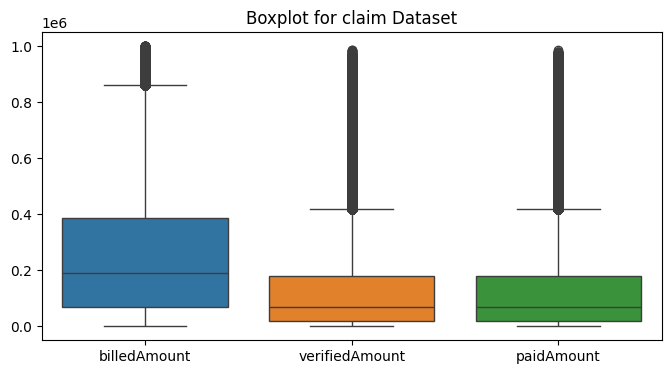

<Figure size 800x400 with 0 Axes>

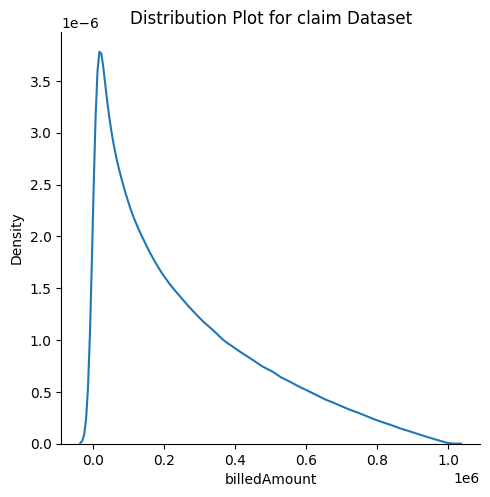

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

df = claim

# Boxplot
plt.figure(figsize=(8, 4))  
sns.boxplot(data=df[['billedAmount', 'verifiedAmount', 'paidAmount']])
plt.title('Boxplot for claim Dataset')
plt.show()

# Distribution Plot 
plt.figure(figsize=(8, 4))
sns.displot(data=df, x='billedAmount', kind='kde') 
plt.title('Distribution Plot for claim Dataset')
plt.show()

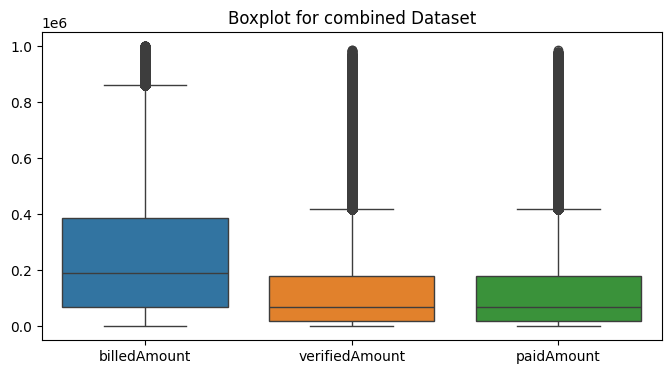

<Figure size 800x400 with 0 Axes>

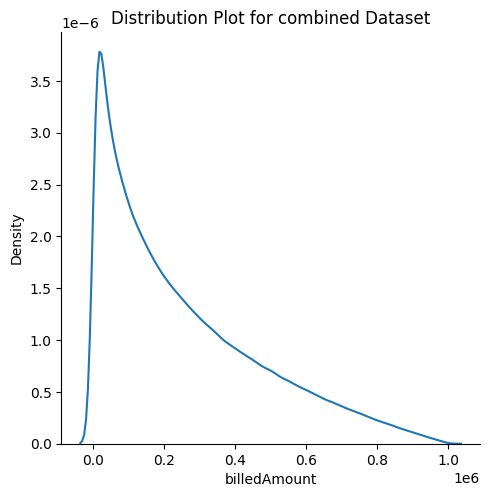

In [21]:
df = combined

# Boxplot
plt.figure(figsize=(8, 4))  
sns.boxplot(data=df[['billedAmount', 'verifiedAmount', 'paidAmount']])
plt.title('Boxplot for combined Dataset')
plt.show()

# Distribution Plot 
plt.figure(figsize=(8, 4))
sns.displot(data=df, x='billedAmount', kind='kde') 
plt.title('Distribution Plot for combined Dataset')
plt.show() 

All datasets show outliers in the boxplots, with long tails in the distribution plots, particularly for 'billedAmount'. These outliers represent a small number of very expensive claims. This is a crucial area for further investigation.

In [22]:
# Let's Counts unique locations per facility

print('Unique locations per facility:')
demo.groupby('facilityName')['location'].nunique()

Unique locations per facility:


facilityName
Anglassron       426
Bamphills        380
Battelklouspa    421
Bea              364
Bridbelwey       357
                ... 
West Dipert      417
West Rayswade    415
Whiteyarm        389
Wnaskas          371
Wya Point        376
Name: location, Length: 100, dtype: int64

These results confirm the suspicion of a location-facility hierarchy. Each facility seems associated with multiple locations. This makes sense geographically!

## Isolating High-Cost Outliers

1. We shall now isolate the outliers we found by setting a threshold.
2. This will allow us to find data that is above this threshold, thus being very costly.

In [23]:
def identify_outliers(df, column):
    """Calculates IQR-based outlier thresholds and returns data above the upper threshold.

    Args:
        df (pandas.DataFrame): The DataFrame to analyze.
        column (str): The name of the column containing numerical data.

    Returns:
        pandas.DataFrame: A DataFrame containing only the outlier rows.
    """

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1 

    upper_threshold = Q3 + 1.5 * IQR 

    outliers = df[df[column] > upper_threshold] 
    return outliers

# Apply the function to your datasets and cost columns:
outliers_claim = pd.DataFrame()  # To store results from 'claim' dataset
outliers_combined = pd.DataFrame() # To store results from 'combined' dataset 

# Define dataset names for tracking
claim_dataset_name = 'claim'  # Update with the correct name if different
combined_dataset_name = 'combined'  # Update with the correct name if different

for dataset in [claim, combined]:    
    for col in ['billedAmount', 'verifiedAmount', 'paidAmount']:
        outliers = identify_outliers(dataset, col)

        # Compare against the defined dataset names
        if dataset_name == claim_dataset_name:  
             outliers_claim = pd.concat([outliers_claim, outliers])
        else:
            outliers_combined = pd.concat([outliers_combined, outliers])

To isolate high-cost outliers for focused analysis, I used an IQR-based outlier detection method. This approach is robust to extreme values, ensuring that our analysis focuses on the most significant drivers of healthcare costs. Outliers were defined as data points exceeding 1.5 times the interquartile range (IQR) above the third quartile (Q3) of the billed amounts.

In [24]:
outliers_combined.shape

(502196, 19)

In [25]:
outliers_claim.shape

(0, 0)

For outliers_claim.shape with a shape of (0, 0), this likely means either:

1. Data Distribution: The cost data in the claim dataset is tightly clustered, with no values exceeding the IQR threshold.
2. Schemes in Sync: It could also indicate remarkable similarity in outliers between the two healthcare schemes within the claim dataset itself.

In [26]:
# We focus on outliers_combined.
outliers_combined.head()

,id,createdAt,updatedAt,scheme,patientId,medicationCode,admissionDate,dischargeDate,medicationName,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount,firstName,lastName,gender,facilityName
7,8db6e123-4e51-4f69-bc26-3c24b387904b,2024-04-23 00:50:54.021515,2024-04-23 00:50:54.027349,RAMA,cb60720f-22d1-4b13-ac31-8da6db40d1cb,58120,2023-07-18 06:10:32.705,2024-01-19 09:46:48.025,X-RAY OF THE LUMBAR SPINE OBLIQUE [RIGHT & LEFT],ICD-J05AF10001,CPT-42242000FQZ381,97,862330,532617,329713,NaN,NaN,NaN,NaN
12,59e3c26f-05bd-431c-882c-23ac0f9533f7,2024-04-23 00:52:19.606624,2024-04-23 00:52:19.629878,MUTUELLE,341945dc-25ba-482a-874a-72a1bd127db1,40003,2024-03-14 19:56:14.138,2024-04-20 16:23:17.566,VENTRICULAR PERITONIUM SHUNT INSERTION,ICD-J01XB01002,CPT-42242000FQZ408,100,900500,853528,46972,NaN,NaN,NaN,NaN
26,7f5a759b-5245-4716-b17a-f7f236d2bb6e,2024-04-23 00:52:19.73286,2024-04-23 00:52:19.832198,RAMA,17469904-7dd7-466d-9090-eba19a6f31dc,35641,2023-04-12 22:32:48.769,2023-09-09 15:52:50.782,OVARIECTOMIE,ICD-J07BC01002,CPT-42242000FQZ359,100,888500,313717,574783,NaN,NaN,NaN,NaN
93,4e764bd4-ab45-44c4-88da-63b0eacdf149,2024-04-23 00:50:58.895434,2024-04-23 00:50:58.907964,MUTUELLE,3de0fe61-1c9d-4e5a-a4ff-af1f1336b882,C01EB10001,2023-09-12 16:01:14.080,2024-04-17 17:17:14.855,ADENOSINE 3MG /ML INJECTION 2ML,ICD-J05AR05002,CPT-42242000FQZ444,88,867680,379075,488605,NaN,NaN,NaN,NaN
247,00dcb660-187d-41ac-86ce-0c02f39275c5,2024-04-23 00:51:24.89241,2024-04-23 00:51:24.903361,MUTUELLE,912056f2-91b9-47a3-9e7a-694ed08350d2,35638-7,2023-05-30 09:47:32.794,2023-06-05 10:59:17.818,SALPINGECTOMY,ICD-J01XC01001,CPT-42242000FQZ395,94,882190,773862,108328,NaN,NaN,NaN,NaN


### Let's check the difference in average cost between outliers and non-outliers

In [27]:
outliers_combined.billedAmount.mean()

694112.372460155

In [28]:
non_outliers = combined[combined.billedAmount<=418600]
non_outliers.billedAmount.mean()

154568.92055948905

The difference in the average billed amount between outlier data and not-outlier data is significant showing that this new outlier dataframe consists of very expensive costs that need further analysis.

In [29]:
# Let's check for unique diagnosis codes
outliers_combined.diagnosisCode.unique()

array(['ICD-J05AF10001', 'ICD-J01XB01002', 'ICD-J07BC01002',
       'ICD-J05AR05002', 'ICD-J01XC01001', 'ICD-J05AB01004',
       'ICD-J01XB02001', 'ICD-J01XB01001', 'ICD-J07BG01001',
       'ICD-J05AP51001', 'ICD-J04AK02002', 'ICD-J02AC01004',
       'ICD-J05AE08002', 'ICD-J04BA01001', 'ICD-J05AF10003',
       'ICD-J04AB01001', 'ICD-J05AG04002', 'ICD-J04AD01001',
       'ICD-J05AR12001', 'ICD-J05AR05001', 'ICD-J05AR10003',
       'ICD-J04AB02001', 'ICD-J01XE01001', 'ICD-J05AE10003',
       'ICD-J04BA02002', 'ICD-J04AM06001', 'ICD-J05AG03003',
       'ICD-J04AA01002', 'ICD-J05AF01001', 'ICD-J02AC01002',
       'ICD-J05AP51002', 'ICD-J05AG03002', 'ICD-J05AR01001',
       'ICD-J04BA02001', 'ICD-J07AM01001', 'ICD-J06AA02001',
       'ICD-J05AE10001', 'ICD-J05AF06001', 'ICD-J04AB02002',
       'ICD-J06AA06001', 'ICD-J04AB04001', 'ICD-J05AG04001',
       'ICD-J01XD01001', 'ICD-J05AF10002', 'ICD-J02AB02001',
       'ICD-J05AR01002', 'ICD-J06BB05001', 'ICD-J05AB01002',
       'ICD-J06BB04001',

In [30]:
# Unique procedure codes
outliers_combined.procedureCode.unique()

array(['CPT-42242000FQZ381', 'CPT-42242000FQZ408', 'CPT-42242000FQZ359',
       'CPT-42242000FQZ444', 'CPT-42242000FQZ395', 'CPT-42242000FQZ365',
       'CPT-42242000FQZ413', 'CPT-42242000FQZ360', 'CPT-42242000FQZ375',
       'CPT-42242000FQZ436', 'CPT-42242000FQZ402', 'CPT-42242000FQZ366',
       'CPT-42242000FQZ368', 'CPT-42242000FQZ389', 'CPT-42242000FQZ380',
       'CPT-42242000FQZ414', 'CPT-42242000FQZ433', 'CPT-42242000FQZ367',
       'CPT-42242000FQZ372', 'CPT-42242000FQZ417', 'CPT-42242000FQZ393',
       'CPT-42242000FQZ412', 'CPT-42242000FQZ378', 'CPT-42242000FQZ369',
       'CPT-42242000FQZ440', 'CPT-42242000FQZ394', 'CPT-42242000FQZ363',
       'CPT-42242000FQZ349', 'CPT-42242000FQZ409', 'CPT-42242000FQZ350',
       'CPT-42242000FQZ358', 'CPT-42242000FQZ422', 'CPT-42242000FQZ401',
       'CPT-42242000FQZ446', 'CPT-42242000FQZ424', 'CPT-42242000FQZ438',
       'CPT-42242000FQZ434', 'CPT-42242000FQZ415', 'CPT-42242000FQZ354',
       'CPT-42242000FQZ445', 'CPT-42242000FQZ353', 

The long lists of unique diagnosisCode (ICD-10) and procedureCode (CPT) values confirm that the outlier dataset captures a diverse range of medical conditions and procedures.

In [31]:
# Summary statistics
outliers_combined[['billedAmount','verifiedAmount','paidAmount']].describe()

,billedAmount,verifiedAmount,paidAmount
count,502196.000000,502196.000000,502196.000000
mean,694112.372460,347508.946065,346603.426395
std,141525.107169,239080.058397,239354.064880
min,418600.000000,1.000000,2.000000
25%,578550.000000,107289.000000,106544.000000
50%,682975.000000,421788.500000,421856.000000
75%,808170.000000,527966.000000,527538.000000
max,1000000.000000,987357.000000,985496.000000


billedAmount ranges from a minimum of 418,600 to a maximum of 1,000,000, with a large standard deviation. Similar cost spread exists for the verifiedAmount and paidAmount columns.
This supports our assumption that these outliers represent very expensive cases.

###### Top Code Frequency

In [32]:
# Count unique diagnosis codes
outliers_combined['diagnosisCode'].value_counts().head(15)

diagnosisCode
ICD-J04BA02002    5348
ICD-J05AF10001    5338
ICD-J01XB02001    5334
ICD-J01XE01001    5334
ICD-J05AE03001    5334
ICD-J05AG03002    5328
ICD-J05AR02001    5322
ICD-J06BB01002    5318
ICD-J05AX08001    5318
ICD-J01XC01001    5288
ICD-J02AA01001    5280
ICD-J04AB04001    5276
ICD-J05AF10002    5264
ICD-J06AA01002    5260
ICD-J01XX04001    5260
Name: count, dtype: int64

In [33]:
# Count unique procedure codes
outliers_combined['procedureCode'].value_counts().head(15)

procedureCode
CPT-42242000FQZ393    5348
CPT-42242000FQZ377    5310
CPT-42242000FQZ435    5308
CPT-42242000FQZ390    5300
CPT-42242000FQZ380    5246
CPT-42242000FQZ378    5234
CPT-42242000FQZ385    5232
CPT-42242000FQZ354    5224
CPT-42242000FQZ430    5224
CPT-42242000FQZ406    5208
CPT-42242000FQZ361    5204
CPT-42242000FQZ358    5192
CPT-42242000FQZ357    5180
CPT-42242000FQZ425    5170
CPT-42242000FQZ428    5170
Name: count, dtype: int64

The top 15 diagnosis and procedure codes exhibit remarkably similar counts, suggesting that no single code overwhelmingly dominates the outliers. This indicates potential complexity in cost patterns.

In [34]:
# We find average costs per diagnosis code and sort by billed amount
avg_costs_by_diagnosis = outliers_combined.groupby('diagnosisCode')[['billedAmount', 'verifiedAmount', 'paidAmount']].mean().sort_values(by=['billedAmount'], ascending=False)
avg_costs_by_diagnosis

,billedAmount,verifiedAmount,paidAmount
diagnosisCode,,,
ICD-J01XC01001,700761.361573,353005.746974,347755.614599
ICD-J01XB02001,700676.130484,351415.835021,349260.295463
ICD-J04AK01001,700602.701815,349309.014677,351293.687138
ICD-J04AM05001,699791.719256,352673.648867,347118.070388
ICD-J04AM02003,699545.786822,358697.043411,340848.743411
...,...,...,...
ICD-J05AR12001,688038.405573,351372.400929,336666.004644
ICD-J05AP51002,687993.654452,348549.903467,339443.750985
ICD-J04AM06001,687446.373839,336203.054180,351243.319659


In [35]:
# We do the same for procedure codes
avg_costs_by_procedure = outliers_combined.groupby('procedureCode')[['billedAmount', 'verifiedAmount', 'paidAmount']].mean().sort_values(by=['billedAmount'], ascending=False)
avg_costs_by_procedure

,billedAmount,verifiedAmount,paidAmount
procedureCode,,,
CPT-42242000FQZ430,703790.093798,352351.815850,351438.277948
CPT-42242000FQZ398,703446.869616,346962.862177,356484.007439
CPT-42242000FQZ358,701647.345917,353961.283128,347686.062789
CPT-42242000FQZ386,701109.834759,343996.231337,357113.603421
CPT-42242000FQZ378,700302.655713,356658.513565,343644.142147
...,...,...,...
CPT-42242000FQZ391,688448.438995,347702.785088,340745.653907
CPT-42242000FQZ351,688237.841683,343402.582766,344835.258918
CPT-42242000FQZ369,687292.397939,345268.348395,342024.049544


###  We create new datasets representing outliers in each scheme

1. We first make a copy of the ouliers_combined dataset.
2. We delete the four columns that have a lot of missing values.
3. We then create new datasets.

In [36]:
# Create a copy
outliers_focused = outliers_combined.copy()
outliers_focused.head(2)

,id,createdAt,updatedAt,scheme,patientId,medicationCode,admissionDate,dischargeDate,medicationName,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount,firstName,lastName,gender,facilityName
7,8db6e123-4e51-4f69-bc26-3c24b387904b,2024-04-23 00:50:54.021515,2024-04-23 00:50:54.027349,RAMA,cb60720f-22d1-4b13-ac31-8da6db40d1cb,58120,2023-07-18 06:10:32.705,2024-01-19 09:46:48.025,X-RAY OF THE LUMBAR SPINE OBLIQUE [RIGHT & LEFT],ICD-J05AF10001,CPT-42242000FQZ381,97,862330,532617,329713,NaN,NaN,NaN,NaN
12,59e3c26f-05bd-431c-882c-23ac0f9533f7,2024-04-23 00:52:19.606624,2024-04-23 00:52:19.629878,MUTUELLE,341945dc-25ba-482a-874a-72a1bd127db1,40003,2024-03-14 19:56:14.138,2024-04-20 16:23:17.566,VENTRICULAR PERITONIUM SHUNT INSERTION,ICD-J01XB01002,CPT-42242000FQZ408,100,900500,853528,46972,NaN,NaN,NaN,NaN


In [37]:
# Delete the columns with a lot of missing data.
outliers_focused.drop(['firstName', 'lastName', 'gender', 'facilityName'], axis=1, inplace=True)
outliers_focused.head(2)

,id,createdAt,updatedAt,scheme,patientId,medicationCode,admissionDate,dischargeDate,medicationName,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
7,8db6e123-4e51-4f69-bc26-3c24b387904b,2024-04-23 00:50:54.021515,2024-04-23 00:50:54.027349,RAMA,cb60720f-22d1-4b13-ac31-8da6db40d1cb,58120,2023-07-18 06:10:32.705,2024-01-19 09:46:48.025,X-RAY OF THE LUMBAR SPINE OBLIQUE [RIGHT & LEFT],ICD-J05AF10001,CPT-42242000FQZ381,97,862330,532617,329713
12,59e3c26f-05bd-431c-882c-23ac0f9533f7,2024-04-23 00:52:19.606624,2024-04-23 00:52:19.629878,MUTUELLE,341945dc-25ba-482a-874a-72a1bd127db1,40003,2024-03-14 19:56:14.138,2024-04-20 16:23:17.566,VENTRICULAR PERITONIUM SHUNT INSERTION,ICD-J01XB01002,CPT-42242000FQZ408,100,900500,853528,46972


In [38]:
# Create new outlier-scheme dataframes

outliers_mutuelle = outliers_focused[outliers_focused['scheme'] == 'MUTUELLE'] 
outliers_rama = outliers_focused[outliers_focused['scheme'] == 'RAMA']

In [39]:
# Check for Mutuelle
outliers_mutuelle.scheme.unique()

array(['MUTUELLE'], dtype=object)

In [40]:
# Check for Rama
outliers_rama.scheme.unique()

array(['RAMA'], dtype=object)

* We now have two new data frames that are scheme-specific and will be used for further analysis.

#### Visualizing Top Cost Drivers

Let's start by visualizing the top 10 cost drivers for both diagnosis and procedure codes within your overall outliers_combined dataset.

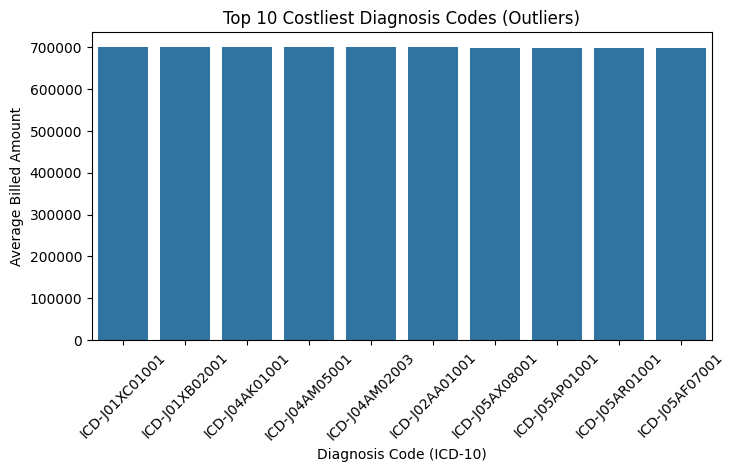

In [41]:
# Diagnosis Code Bar Plot
top_diagnosis_costs = avg_costs_by_diagnosis.head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_diagnosis_costs.index, y=top_diagnosis_costs['billedAmount'])
plt.xticks(rotation=45)
plt.title(f"Top 10 Costliest Diagnosis Codes (Outliers)")
plt.xlabel("Diagnosis Code (ICD-10)")
plt.ylabel("Average Billed Amount")
plt.show()

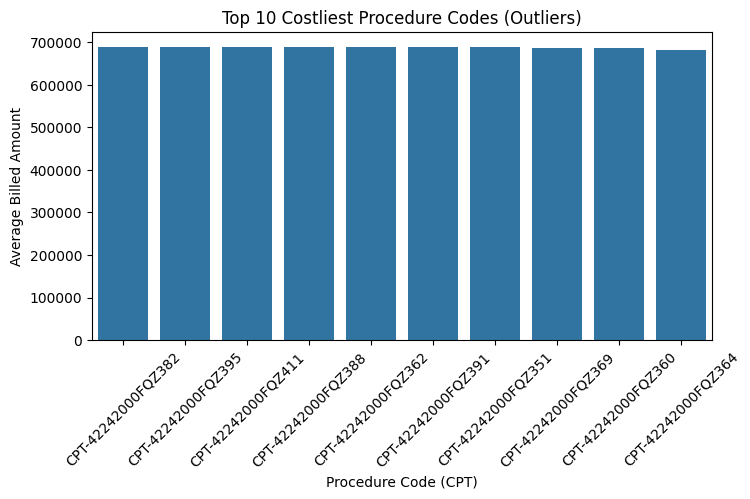

In [42]:
# Procedure Code Bar Plot (Repeat with avg_costs_by_procedure)
top_procedure_costs = avg_costs_by_procedure.tail(10)
plt.figure(figsize=(8, 4)) 
sns.barplot(x=top_procedure_costs.index, y=top_procedure_costs['billedAmount'])
plt.xticks(rotation=45)
plt.title(f"Top 10 Costliest Procedure Codes (Outliers)")
plt.xlabel("Procedure Code (CPT)")
plt.ylabel("Average Billed Amount")
plt.show()

Considering that all the bars in the plots are roughly the same height, this suggests that the top 10 cost drivers in both diagnosis and procedure codes have relatively similar average billed amounts within the outliers dataset.

* The variation doesn't change much for 20 bars
* This highlights a group of potentially concerning codes that warrant further investigation.

### Diagnosis and Procedure Codes Analysis

### Investigating why these outlier codes have the highest billed amounts

* We have identified diagnosis codes and procedure codes with very high costs.
* We shall focus on the top few ones and see why they are expensive.

#### Highest diagnosis code - 'ICD-J01XC01001',  'ICD-J04AM02003', 'ICD-J05AR12001', 'ICD-J05AE10003'

In [43]:
# Focus on a specific diagnosis code
high_cost_diagnosis = 'ICD-J01XC01001'
diagnosis_outliers = combined[combined['diagnosisCode'] == high_cost_diagnosis]
diagnosis_outliers.head(3)

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
34,d251445f-afa5-426e-b28d-091cba9c008c,Bobbie,Konopelski,MALE,Great Ponar,MUTUELLE,42131707BWG006,FACE MASK SIZE 3,2023-09-20 16:38:31.766,2023-09-21 13:51:53.778,ICD-J01XC01001,CPT-42242000FQZ412,70,149800,134492,15308
86,88206dd7-5ceb-4733-bb10-1cd476103f38,Elena,Rogahn,MALE,Chladeda,MUTUELLE,30023-5,DEBRIDEMENT AND SKIN GRAFT (>2% BUT <5% BSA) ...,2023-04-26 17:15:25.655,2023-08-31 23:52:02.850,ICD-J01XC01001,CPT-42242000FQZ405,87,805620,725054,80566
220,119d1d14-bd92-41d8-9c4e-bc542ca3d939,Jasmine,Wilderman,FEMALE,Stourrsonmoor,RAMA,35542,CAUTERIZATION OF EXTENSIVE VULVAR CONDYLOMA (...,2023-10-10 22:29:56.046,2024-02-10 21:46:09.724,ICD-J01XC01001,CPT-42242000FQZ365,29,147465,143283,4182


In [44]:
# unique medications used in conjunction with this diagnosis code
unique_medications = diagnosis_outliers['medicationCode'].unique()
print(unique_medications)

['42131707BWG006' '30023-5' '35542' '35638-7' '35641' '35649-4'
 'M01AB05005' 'P01AB01001' '37014' '30297' '30627' '32120'
 '42131707BWG004' '35729' '42312201FXK089' 'P03AX01004' '40100-2' '30223'
 '30229' 'A03F01001' '47018' 'B03BB01001' '30597' '32139' '20920' '38803'
 '32138' '37212' '42271709FDR003' 'J01EE01002' 'L2951-2' '30390'
 'J01FA01003' '30226' '32003' 'G02AD06001' 'C01EB10001' '42142609FMQ005'
 '21100' '32005' '20820' '32012' '30405' 'S01FA01003' '40100-3'
 '42152711GGB002' 'D7073' 'A11DA01003' 'J01MA03001' '32000' '31362'
 '31366' '20730' '21461' '21474' 'A10BB12002' 'S01ED01003' '37438' '21460'
 '30023' '21532' '58120' '31360' '32009' '21600' '42142523FNL002' '31364'
 'J01FA01004' '40003' '35539' 'R03AC02003' '20960' '42131707BWG005'
 '30571' 'A02BC01001' '20900' 'M01AB05001' '31512' '30433' '35653' '30614'
 '32018' '42312003EIR002' '37604' '42311708EHK005' '42311511ELZ011'
 'D01AC20005' 'M01AE01004' '32147-1' '30631' '31357' '20832' '30645'
 '20800' '32004' 'C3-2T' '4213

In [45]:
# Expensive medications
med_cost_breakdown = diagnosis_outliers.groupby('medicationCode')['billedAmount'].mean()
med_cost_breakdown = med_cost_breakdown.sort_values(ascending=False)
med_cost_breakdown.head(10)

medicationCode
42311708EHK005    289548.651163
P01AB01001        282769.404145
42131707BWG006    282056.345029
35542             280174.425000
20730             279934.502488
37604             278019.349593
30023             277853.835616
31364             274749.973545
40100-3           274182.474747
30223             272769.127660
Name: billedAmount, dtype: float64

In [46]:
# Expensive facilities
facility_cost_breakdown = diagnosis_outliers.groupby('facilityName')['billedAmount'].mean().sort_values(ascending=False)
facility_cost_breakdown.head(10)

facilityName
Chenam             298159.462366
Daubar             295172.775000
Grand Thebu        294054.977477
El Gelrnie         292692.214612
New Denswe         291402.914573
Mount Squimond     290875.073892
Port Dsorpids      282904.581281
Grand Mountnell    282342.272727
Kinggaspmouth      281544.260204
St Sheyorkwyong    280417.524752
Name: billedAmount, dtype: float64

In [47]:
# Make a copy of diagnosis_outliers
new_do = diagnosis_outliers.copy()
new_do.head(3)

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
34,d251445f-afa5-426e-b28d-091cba9c008c,Bobbie,Konopelski,MALE,Great Ponar,MUTUELLE,42131707BWG006,FACE MASK SIZE 3,2023-09-20 16:38:31.766,2023-09-21 13:51:53.778,ICD-J01XC01001,CPT-42242000FQZ412,70,149800,134492,15308
86,88206dd7-5ceb-4733-bb10-1cd476103f38,Elena,Rogahn,MALE,Chladeda,MUTUELLE,30023-5,DEBRIDEMENT AND SKIN GRAFT (>2% BUT <5% BSA) ...,2023-04-26 17:15:25.655,2023-08-31 23:52:02.850,ICD-J01XC01001,CPT-42242000FQZ405,87,805620,725054,80566
220,119d1d14-bd92-41d8-9c4e-bc542ca3d939,Jasmine,Wilderman,FEMALE,Stourrsonmoor,RAMA,35542,CAUTERIZATION OF EXTENSIVE VULVAR CONDYLOMA (...,2023-10-10 22:29:56.046,2024-02-10 21:46:09.724,ICD-J01XC01001,CPT-42242000FQZ365,29,147465,143283,4182


In [48]:
# merge new_do with location from demography
new_do_with_location = new_do.merge(demo[['id', 'location']], on='id', how='left')
new_do_with_location.head(2)

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount,location
0,d251445f-afa5-426e-b28d-091cba9c008c,Bobbie,Konopelski,MALE,Great Ponar,MUTUELLE,42131707BWG006,FACE MASK SIZE 3,2023-09-20 16:38:31.766,2023-09-21 13:51:53.778,ICD-J01XC01001,CPT-42242000FQZ412,70,149800,134492,15308,Jacynthefurt
1,88206dd7-5ceb-4733-bb10-1cd476103f38,Elena,Rogahn,MALE,Chladeda,MUTUELLE,30023-5,DEBRIDEMENT AND SKIN GRAFT (>2% BUT <5% BSA) ...,2023-04-26 17:15:25.655,2023-08-31 23:52:02.850,ICD-J01XC01001,CPT-42242000FQZ405,87,805620,725054,80566,Peabody


In [49]:
# Re-calculate location costs with the new dataframe
location_cost_breakdown = new_do_with_location.groupby('location')['billedAmount'].mean().sort_values(ascending=False)
location_cost_breakdown.head(10)

location
Lake Otho               999000.0
Willside                997500.0
Fort Rubye              996000.0
New Lori                993000.0
West Ulises             985545.0
Hackettville            980000.0
New Richmondville       976570.0
Corkeryville            976570.0
Port Jermainechester    975000.0
Abshireton              972160.0
Name: billedAmount, dtype: float64

* We have now found that these high diagnosis codes have very expensive medications, facilities and there's high regional cost variations.

#### Visualize expensive meds and facilities with their outliers

* We shall visualize the above, and also find within them more expensive ones.
* These higher outliers can be analyzed as a starting point for cost-reduction and then go for procedures and diagnoses.

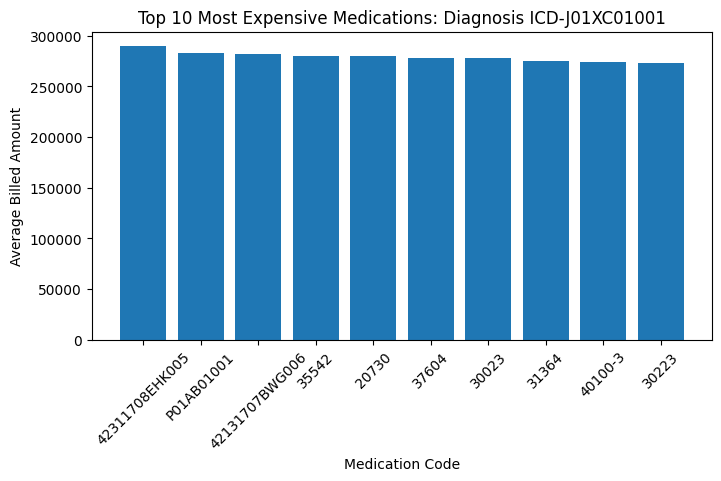

In [50]:
# Top medical costs for our diagnosisCode
top_med_costs = med_cost_breakdown.head(10)
plt.figure(figsize=(8, 4))
plt.bar(top_med_costs.index, top_med_costs.values)
plt.xticks(rotation=45)
plt.xlabel("Medication Code")
plt.ylabel("Average Billed Amount")
plt.title("Top 10 Most Expensive Medications: Diagnosis ICD-J01XC01001")
plt.show()

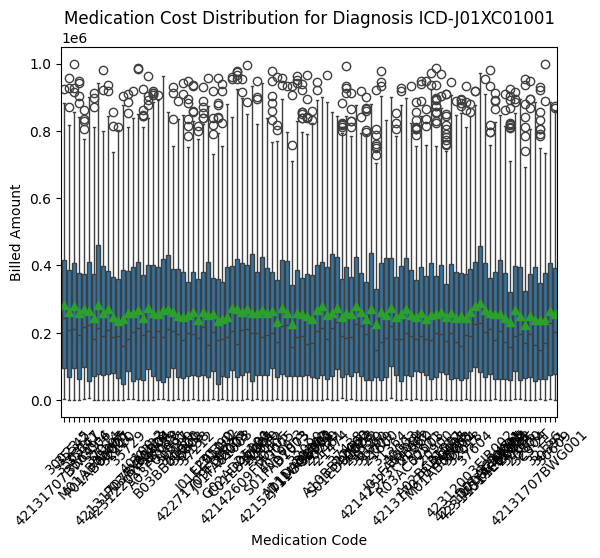

In [51]:
sns.boxplot(
    x = "medicationCode",
    y = "billedAmount",
    showmeans=True, # Optional: Shows the mean within each box
    data=diagnosis_outliers 
)

plt.xticks(rotation=45) # Rotate x-axis labels for readability
plt.title("Medication Cost Distribution for Diagnosis ICD-J01XC01001")
plt.xlabel("Medication Code")
plt.ylabel("Billed Amount")
plt.show()

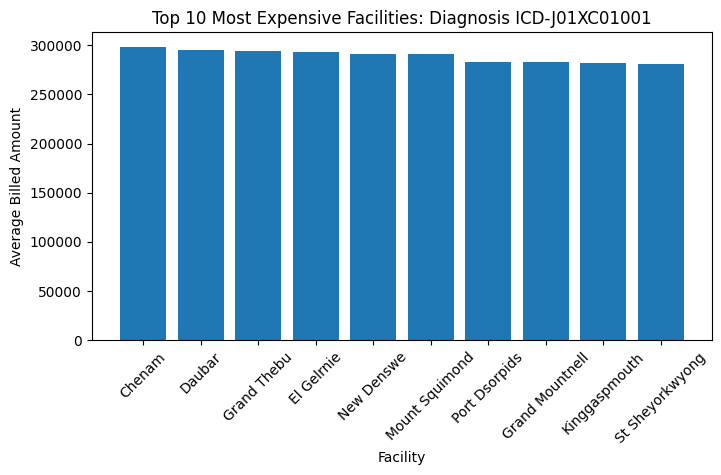

In [52]:
# Top facility costs for our diagnosisCode
top_facility_costs = facility_cost_breakdown.head(10)
plt.figure(figsize=(8, 4))
plt.bar(top_facility_costs.index, top_facility_costs.values)
plt.xticks(rotation=45)
plt.xlabel("Facility")
plt.ylabel("Average Billed Amount")
plt.title("Top 10 Most Expensive Facilities: Diagnosis ICD-J01XC01001")
plt.show()

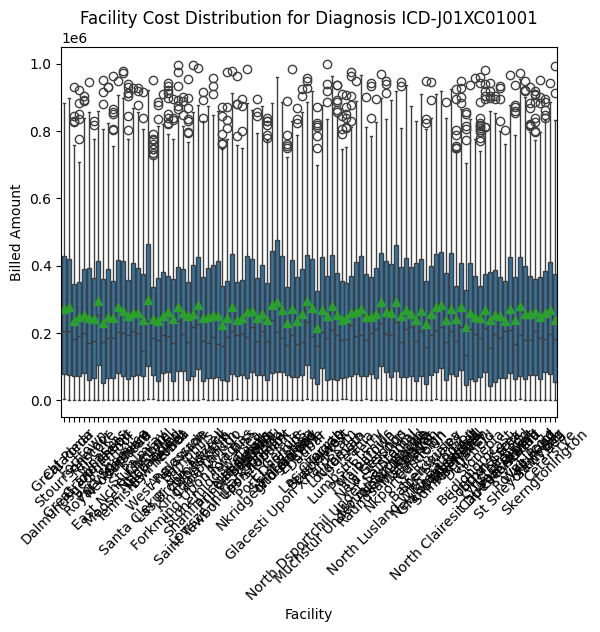

In [53]:
sns.boxplot(
    x = "facilityName",
    y = "billedAmount",
    showmeans=True,
    data=diagnosis_outliers 
)

plt.xticks(rotation=45)
plt.title("Facility Cost Distribution for Diagnosis ICD-J01XC01001")
plt.xlabel("Facility")
plt.ylabel("Billed Amount")
plt.show()

These distribution box plots indicate that at the top of the visualization, there are many points or dots clustered there which indicate that within the outliers, we have found initially there are others even bigger than them. These indicate even moer expensive medications and facilities that need further analysis and attention for cost reduction.

### Isolate again the new higher outliers into new data frames for easy access.

1. We are going to isolate these specific higher outliers using IQR
2. We create new dataframes to access these high cost medications and facilities.

In [54]:
# Calculate IQR
Q1 = diagnosis_outliers['billedAmount'].quantile(0.25)
Q3 = diagnosis_outliers['billedAmount'].quantile(0.75)
IQR = Q3 - Q1 

outlier_threshold_upper = Q3 + 1.5 * IQR
outlier_threshold_lower = Q1 - 1.5 * IQR

In [55]:
# Create the dataframes
outlier_meds = diagnosis_outliers[diagnosis_outliers['billedAmount'] > outlier_threshold_upper]

outlier_facilities = diagnosis_outliers[diagnosis_outliers['billedAmount'] > outlier_threshold_upper]

In [56]:
outlier_meds.head(3)

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
225,912056f2-91b9-47a3-9e7a-694ed08350d2,Rex,Macejkovic,FEMALE,Dalmundsgeorgemoor,MUTUELLE,35638-7,SALPINGECTOMY,2023-05-30 09:47:32.794,2023-06-05 10:59:17.818,ICD-J01XC01001,CPT-42242000FQZ395,94,882190,773862,108328
12915,05ae6176-7176-4928-9c29-d321910aebe4,Nadine,McClure,MALE,North Dsportchil Under Saintehou,RAMA,A11DA01003,VITAMIN B 1 100MG/2ML SOLUTION FOR INJECTION,2023-06-29 08:47:40.774,2024-04-21 01:55:50.129,ICD-J01XC01001,CPT-42242000FQZ386,97,963210,948722,14488
22197,5c5112eb-b74d-4aed-af9e-978d6aeee726,Jeremiah,Zieme,MALE,Las Hyrest,MUTUELLE,30023,"DEBRIDEMENT OF WOUND, MINOR",2023-08-19 23:56:37.162,2023-11-26 09:52:43.665,ICD-J01XC01001,CPT-42242000FQZ435,99,877635,130871,746764


In [57]:
outlier_facilities.head(2)

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
225,912056f2-91b9-47a3-9e7a-694ed08350d2,Rex,Macejkovic,FEMALE,Dalmundsgeorgemoor,MUTUELLE,35638-7,SALPINGECTOMY,2023-05-30 09:47:32.794,2023-06-05 10:59:17.818,ICD-J01XC01001,CPT-42242000FQZ395,94,882190,773862,108328
12915,05ae6176-7176-4928-9c29-d321910aebe4,Nadine,McClure,MALE,North Dsportchil Under Saintehou,RAMA,A11DA01003,VITAMIN B 1 100MG/2ML SOLUTION FOR INJECTION,2023-06-29 08:47:40.774,2024-04-21 01:55:50.129,ICD-J01XC01001,CPT-42242000FQZ386,97,963210,948722,14488


In [58]:
# Check for location IQR
loc_Q1 = new_do_with_location['billedAmount'].quantile(0.25)
loc_Q3 = new_do_with_location['billedAmount'].quantile(0.75)
loc_IQR = loc_Q3 - loc_Q1 

loc_outlier_threshold_upper = loc_Q3 + 1.5 * loc_IQR
loc_outlier_threshold_lower = loc_Q1 - 1.5 * loc_IQR

In [59]:
outlier_locations = new_do_with_location[new_do_with_location['billedAmount'] > loc_outlier_threshold_upper]
outlier_locations.head()

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount,location
3,912056f2-91b9-47a3-9e7a-694ed08350d2,Rex,Macejkovic,FEMALE,Dalmundsgeorgemoor,MUTUELLE,35638-7,SALPINGECTOMY,2023-05-30 09:47:32.794,2023-06-05 10:59:17.818,ICD-J01XC01001,CPT-42242000FQZ395,94,882190,773862,108328,Eddborough
136,05ae6176-7176-4928-9c29-d321910aebe4,Nadine,McClure,MALE,North Dsportchil Under Saintehou,RAMA,A11DA01003,VITAMIN B 1 100MG/2ML SOLUTION FOR INJECTION,2023-06-29 08:47:40.774,2024-04-21 01:55:50.129,ICD-J01XC01001,CPT-42242000FQZ386,97,963210,948722,14488,Haskellfurt
240,5c5112eb-b74d-4aed-af9e-978d6aeee726,Jeremiah,Zieme,MALE,Las Hyrest,MUTUELLE,30023,"DEBRIDEMENT OF WOUND, MINOR",2023-08-19 23:56:37.162,2023-11-26 09:52:43.665,ICD-J01XC01001,CPT-42242000FQZ435,99,877635,130871,746764,Bechtelarboro
328,3f7bf23c-dbdd-4f3c-ba7c-dd1d837eb2b3,Delia,Ratke,MALE,Wya Point,RAMA,21100,INITIATION & MANAGEMENT OF ANAESTHESIA FOR PE...,2023-06-08 16:39:25.001,2023-09-15 03:09:38.104,ICD-J01XC01001,CPT-42242000FQZ356,94,932010,562234,369776,Ziemannport
393,b86af8db-6383-4084-b867-a73397c31328,Gail,Ferry,FEMALE,New Gessdon,MUTUELLE,20920,INITIATION & MANAGEMENT OF ANAESTHESIA FOR PE...,2024-03-08 23:08:55.685,2024-04-10 22:38:04.945,ICD-J01XC01001,CPT-42242000FQZ440,99,941490,158300,783190,Sengerside


We have created new data frames for extremely expensive medications and facilities.

#### Highest procedure code - 'CPT-42242000FQZ430', 'CPT-42242000FQZ378', 'CPT-42242000FQZ391'

In [60]:
# Focus on a specific procedure code

procedure_outliers = combined[combined['procedureCode'] == 'CPT-42242000FQZ430']
procedure_outliers.head(3)

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
89,b4e0f5f7-551a-4431-bc8b-1fe9d7779e65,Wendell,Collier,FEMALE,Felscoke,MUTUELLE,35649-4,MYOMECTOMY,2023-07-13 18:49:28.591,2023-08-28 08:03:22.622,ICD-J04AB02002,CPT-42242000FQZ430,56,376320,57851,318469
104,e253e6a6-eef2-4683-84b9-33e8bccdfd64,Claude,Altenwerth,MALE,West Rayswade,MUTUELLE,35641,OVARIECTOMIE,2023-11-03 17:20:41.922,2023-12-06 19:09:12.287,ICD-J04AA01002,CPT-42242000FQZ430,45,192375,60897,131478
111,6ffcef10-9266-4746-84cd-7feaa82cf9d2,Hazel,Ward,FEMALE,Great Richot,RAMA,32005,LARGE INTESTINE RESECTION (SUBTOTAL COLECTOMY...,2024-01-27 11:21:27.014,2024-04-12 09:51:40.478,ICD-J05AR02002,CPT-42242000FQZ430,60,41700,2672,39028


In [61]:
med_cost_breakdown1 = procedure_outliers.groupby('medicationCode')['billedAmount'].mean()
med_cost_breakdown1 = med_cost_breakdown1.sort_values(ascending=False)
med_cost_breakdown1.head(10)

medicationCode
30405             296450.159574
30229             289488.128205
32009             284855.047619
42142609FMQ005    284770.023810
20920             283306.136364
J01FA01003        279687.652582
31357             278426.761658
M01AE01004        277791.196809
M01AB05005        276226.994819
42131707BWG001    275632.247475
Name: billedAmount, dtype: float64

In [62]:
# the average billedAmount for this diagnosis code at each facility
facility_cost_breakdown1 = procedure_outliers.groupby('facilityName')['billedAmount'].mean().sort_values(ascending=False)
facility_cost_breakdown1.head(10)

facilityName
Kinggaspmouth                  306456.370968
Las Shopsant                   296090.340314
Ritral                         286909.973822
Royal Websteam                 285652.609756
St Sheyorkwyong                281972.921687
Lumbsur Ferry                  280859.475138
North Lusland With Bathdsor    280734.918033
La Stekings                    279416.082949
Tennis-By-The-Sea              279240.601093
Ngemath                        279236.058201
Name: billedAmount, dtype: float64

In [63]:
# Make a copy of procedure_outliers
new_po = procedure_outliers.copy()
new_po.head(3)

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
89,b4e0f5f7-551a-4431-bc8b-1fe9d7779e65,Wendell,Collier,FEMALE,Felscoke,MUTUELLE,35649-4,MYOMECTOMY,2023-07-13 18:49:28.591,2023-08-28 08:03:22.622,ICD-J04AB02002,CPT-42242000FQZ430,56,376320,57851,318469
104,e253e6a6-eef2-4683-84b9-33e8bccdfd64,Claude,Altenwerth,MALE,West Rayswade,MUTUELLE,35641,OVARIECTOMIE,2023-11-03 17:20:41.922,2023-12-06 19:09:12.287,ICD-J04AA01002,CPT-42242000FQZ430,45,192375,60897,131478
111,6ffcef10-9266-4746-84cd-7feaa82cf9d2,Hazel,Ward,FEMALE,Great Richot,RAMA,32005,LARGE INTESTINE RESECTION (SUBTOTAL COLECTOMY...,2024-01-27 11:21:27.014,2024-04-12 09:51:40.478,ICD-J05AR02002,CPT-42242000FQZ430,60,41700,2672,39028


In [64]:
# merge new_do with location from demography
new_po_with_location = new_po.merge(demo[['id', 'location']], on='id', how='left')
new_po_with_location.head(2)

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount,location
0,b4e0f5f7-551a-4431-bc8b-1fe9d7779e65,Wendell,Collier,FEMALE,Felscoke,MUTUELLE,35649-4,MYOMECTOMY,2023-07-13 18:49:28.591,2023-08-28 08:03:22.622,ICD-J04AB02002,CPT-42242000FQZ430,56,376320,57851,318469,Nolanview
1,e253e6a6-eef2-4683-84b9-33e8bccdfd64,Claude,Altenwerth,MALE,West Rayswade,MUTUELLE,35641,OVARIECTOMIE,2023-11-03 17:20:41.922,2023-12-06 19:09:12.287,ICD-J04AA01002,CPT-42242000FQZ430,45,192375,60897,131478,Milfordfield


In [65]:
# Re-calculate location costs with the new dataframe
location_cost_breakdown1 = new_po_with_location.groupby('location')['billedAmount'].mean().sort_values(ascending=False)
location_cost_breakdown1.head(10)

location
South Nyasia         980000.0
New Phoebeborough    973140.0
Kuvalisview          969030.0
Lake Nathanfurt      969000.0
Hoppeview            968240.0
West Josianefield    967500.0
Makenziefurt         967260.0
Nicoletteton         963000.0
Windlerfort          959330.0
Lamontstad           958080.0
Name: billedAmount, dtype: float64

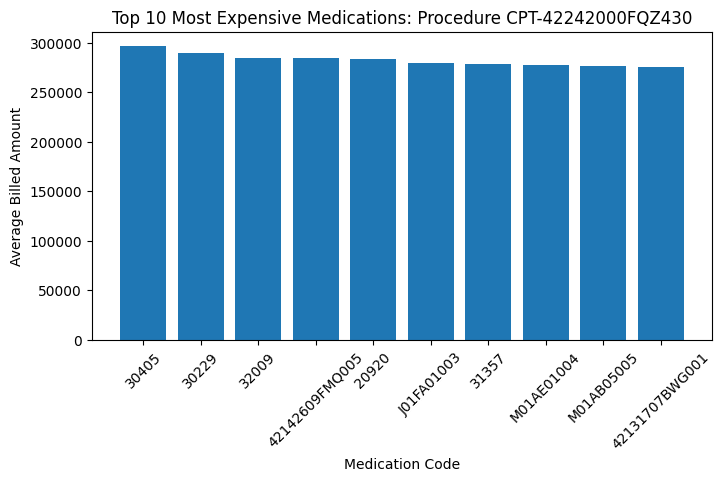

In [66]:
# Top medical costs for our procedureCode
top_med_costs1 = med_cost_breakdown1.head(10)
plt.figure(figsize=(8, 4))
plt.bar(top_med_costs1.index, top_med_costs1.values)
plt.xticks(rotation=45)
plt.xlabel("Medication Code")
plt.ylabel("Average Billed Amount")
plt.title("Top 10 Most Expensive Medications: Procedure CPT-42242000FQZ430")
plt.show()

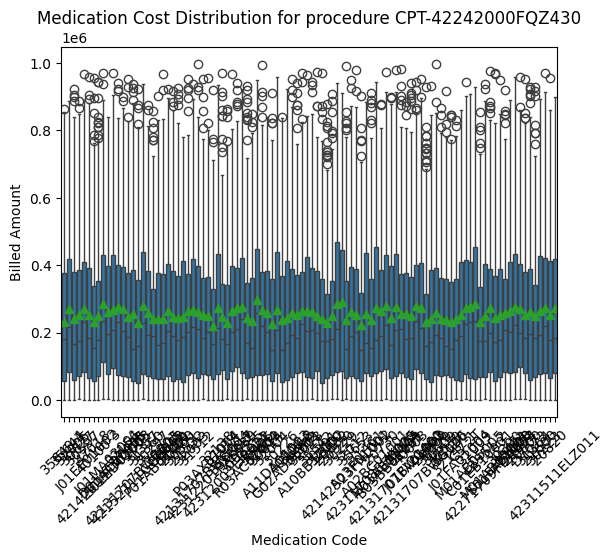

In [67]:
sns.boxplot(
    x = "medicationCode",
    y = "billedAmount",
    showmeans=True, # Optional: Shows the mean within each box
    data=procedure_outliers
)

plt.xticks(rotation=45) # Rotate x-axis labels for readability
plt.title("Medication Cost Distribution for procedure CPT-42242000FQZ430")
plt.xlabel("Medication Code")
plt.ylabel("Billed Amount")
plt.show()

### Let's create new dataframes for these higher outliers for procedure code

In [68]:
# Calculate IQR
pQ1 = diagnosis_outliers['billedAmount'].quantile(0.25)
pQ3 = diagnosis_outliers['billedAmount'].quantile(0.75)
pIQR = pQ3 - pQ1 

outlier_threshold_upper1 = pQ3 + 1.5 * pIQR
outlier_threshold_lower1 = pQ1 - 1.5 * pIQR

In [69]:
# Create the dataframes
outlier_meds1 = procedure_outliers[procedure_outliers['billedAmount'] > outlier_threshold_upper1]

outlier_facilities1 = procedure_outliers[procedure_outliers['billedAmount'] > outlier_threshold_upper1]
outlier_facilities1.head(3)

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
18040,7d9fa9af-d48b-4b1b-b2c2-c02a6ad568a5,Craig,White,MALE,Neoderstead,RAMA,A10BB12002,GLIMEPIRIDE 3MG TABLET B/30,2023-07-14 05:32:48.357,2024-02-02 06:02:51.821,ICD-J05AG03003,CPT-42242000FQZ430,94,935300,613714,321586
18149,d026c039-8d89-4186-acb3-0adc34dfe29f,Leon,Torphy,FEMALE,Royal Websteam,RAMA,A11DA01003,VITAMIN B 1 100MG/2ML SOLUTION FOR INJECTION,2023-12-21 05:20:21.595,2024-02-18 02:40:41.634,ICD-J05AP01001,CPT-42242000FQZ430,96,958080,438764,519316
26562,83e5dc81-3f67-4c17-9b4f-5da4b7b3ab68,Alvin,Gislason,MALE,West Dipert,MUTUELLE,A02BC01001,OMEPRAZOLE 20MG CAPSULE,2023-11-10 01:35:02.759,2023-11-19 07:28:49.919,ICD-J05AR05002,CPT-42242000FQZ430,100,926000,402216,523784


In [70]:
# Check for location IQR
loc_pQ1 = new_po_with_location['billedAmount'].quantile(0.25)
loc_pQ3 = new_po_with_location['billedAmount'].quantile(0.75)
loc_pIQR = loc_pQ3 - loc_pQ1 

outlier_threshold_upper2 = loc_pQ3 + 1.5 * loc_pIQR
outlier_threshold_lower2 = loc_pQ1 - 1.5 * loc_pIQR

In [71]:
outlier_locations1 = new_po_with_location[new_po_with_location['billedAmount'] > outlier_threshold_upper2]
outlier_locations1.head(3)

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount,location
177,7d9fa9af-d48b-4b1b-b2c2-c02a6ad568a5,Craig,White,MALE,Neoderstead,RAMA,A10BB12002,GLIMEPIRIDE 3MG TABLET B/30,2023-07-14 05:32:48.357,2024-02-02 06:02:51.821,ICD-J05AG03003,CPT-42242000FQZ430,94,935300,613714,321586,Goodwinberg
179,d026c039-8d89-4186-acb3-0adc34dfe29f,Leon,Torphy,FEMALE,Royal Websteam,RAMA,A11DA01003,VITAMIN B 1 100MG/2ML SOLUTION FOR INJECTION,2023-12-21 05:20:21.595,2024-02-18 02:40:41.634,ICD-J05AP01001,CPT-42242000FQZ430,96,958080,438764,519316,Sauerchester
257,83e5dc81-3f67-4c17-9b4f-5da4b7b3ab68,Alvin,Gislason,MALE,West Dipert,MUTUELLE,A02BC01001,OMEPRAZOLE 20MG CAPSULE,2023-11-10 01:35:02.759,2023-11-19 07:28:49.919,ICD-J05AR05002,CPT-42242000FQZ430,100,926000,402216,523784,Fort Carriechester


In [72]:
mil_outliers = outliers_combined[outliers_combined.billedAmount==1000000]
mil_outliers.head(2)

,id,createdAt,updatedAt,scheme,patientId,medicationCode,admissionDate,dischargeDate,medicationName,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount,firstName,lastName,gender,facilityName
179003,76e219f8-7af3-423b-a216-8c509cbde5d1,2024-04-23 00:51:26.027455,2024-04-23 00:51:26.046607,RAMA,0df6e810-1280-4602-8204-8eacf2de1100,30433,2023-09-14 09:58:15.868,2023-11-19 14:43:25.694,"LIVER ABCESS/CYST DRAINAGE ([MULTIPLE], OPEN ...",ICD-J04AD01001,CPT-42242000FQZ439,100,1000000,314393,685607,NaN,NaN,NaN,NaN
224102,5a154a44-1381-4637-a22d-222f5b65807e,2024-04-23 00:53:22.832276,2024-04-23 00:53:22.846757,RAMA,ed5c17d0-f865-48ce-a74a-3d183895c924,30023-5,2023-04-21 00:37:20.837,2023-05-17 16:50:22.355,DEBRIDEMENT AND SKIN GRAFT (>2% BUT <5% BSA) ...,ICD-J04BA01001,CPT-42242000FQZ402,100,1000000,558602,441398,NaN,NaN,NaN,NaN


* Findings: We identified a group of high-cost outlier diagnosis codes (average billed amounts up to 990,000), including ICD-J01XC01001 and others.  No single diagnosis or procedure dominates costs, emphasizing the complexity of the issue.

* Factors and Recommendations: In-depth analysis of ICD-J01XC01001 reveals:

1. Expensive medications – investigating alternatives could reduce costs.
2. Billing variations across facilities – targeted review and negotiations are recommended.
3. Regional cost differences – optimizing contracts and reimbursement in these areas has potential for savings.

* Data frames for accessing these expensive costs are: outlier_meds, outlier_facilities, outlier_locations. For procedures, they are the same names with an addition of 1 on each.

* Complexity Across Codes: Similar patterns were observed across multiple outlier diagnosis codes, highlighting the need for comprehensive cost-reduction strategies.

### Cost difference by schemes

* MUTUELLE and RAMA

In [73]:
outliers_mutuelle.head(2)

,id,createdAt,updatedAt,scheme,patientId,medicationCode,admissionDate,dischargeDate,medicationName,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
12,59e3c26f-05bd-431c-882c-23ac0f9533f7,2024-04-23 00:52:19.606624,2024-04-23 00:52:19.629878,MUTUELLE,341945dc-25ba-482a-874a-72a1bd127db1,40003,2024-03-14 19:56:14.138,2024-04-20 16:23:17.566,VENTRICULAR PERITONIUM SHUNT INSERTION,ICD-J01XB01002,CPT-42242000FQZ408,100,900500,853528,46972
93,4e764bd4-ab45-44c4-88da-63b0eacdf149,2024-04-23 00:50:58.895434,2024-04-23 00:50:58.907964,MUTUELLE,3de0fe61-1c9d-4e5a-a4ff-af1f1336b882,C01EB10001,2023-09-12 16:01:14.080,2024-04-17 17:17:14.855,ADENOSINE 3MG /ML INJECTION 2ML,ICD-J05AR05002,CPT-42242000FQZ444,88,867680,379075,488605


In [74]:
# Average billed amount in mutuelle
outliers_mutuelle.groupby(['diagnosisCode','procedureCode'])['billedAmount'].mean().sort_values(ascending=False)

diagnosisCode   procedureCode     
ICD-J05AF05002  CPT-42242000FQZ436    950880.000000
ICD-J05AP08001  CPT-42242000FQZ421    902533.333333
ICD-J01XB02001  CPT-42242000FQZ426    868240.714286
ICD-J04AK02002  CPT-42242000FQZ404    865580.000000
ICD-J04AB02001  CPT-42242000FQZ406    863910.555556
                                          ...      
ICD-J01XB02001  CPT-42242000FQZ362    539668.125000
ICD-J06AA06001  CPT-42242000FQZ368    532833.333333
ICD-J04AB02001  CPT-42242000FQZ364    495287.500000
ICD-J05AG01002  CPT-42242000FQZ403    494475.000000
ICD-J05AF01001  CPT-42242000FQZ365    480600.000000
Name: billedAmount, Length: 9800, dtype: float64

In [75]:
# Average billed amount in rama
outliers_rama.groupby(['diagnosisCode','procedureCode'])['billedAmount'].mean().sort_values(ascending=False)

diagnosisCode   procedureCode     
ICD-J05AB01002  CPT-42242000FQZ349    898845.000000
ICD-J01XB01001  CPT-42242000FQZ350    882226.666667
ICD-J06BA02001  CPT-42242000FQZ418    864610.384615
ICD-J06BB01001  CPT-42242000FQZ351    861960.714286
ICD-J07BC01001  CPT-42242000FQZ379    856495.000000
                                          ...      
ICD-J05AP51002  CPT-42242000FQZ441    524568.333333
ICD-J04AB01001  CPT-42242000FQZ395    518451.250000
ICD-J04AB02002  CPT-42242000FQZ381    511425.000000
ICD-J04AK02001  CPT-42242000FQZ417    511285.000000
ICD-J02AA01001  CPT-42242000FQZ367    498756.666667
Name: billedAmount, Length: 9800, dtype: float64

### Shared codes

* We now try to find if these two schemes have any diagnosis or procedure codes that are shared and can be consulted for cost-reduction and further analysis

In [76]:
# Make sure to do this for both 'outliers_mutuelle' and 'outliers_rama' 
outliers_mutuelle = outliers_mutuelle.set_index(['diagnosisCode', 'procedureCode'])
outliers_rama = outliers_rama.set_index(['diagnosisCode', 'procedureCode'])

In [77]:
shared_codes = set(outliers_mutuelle.index.get_level_values("diagnosisCode").unique()) & set(outliers_rama.index.get_level_values("diagnosisCode").unique())
print(shared_codes)

{'ICD-J02AC01004', 'ICD-J05AR01002', 'ICD-J05AP08001', 'ICD-J02AC01003', 'ICD-J01XD01001', 'ICD-J01XB02001', 'ICD-J05AR02002', 'ICD-J04AM05001', 'ICD-J05AG03001', 'ICD-J01XE01001', 'ICD-J06AA03001', 'ICD-J05AE10001', 'ICD-J02AC01001', 'ICD-J02AA01001', 'ICD-J05AF01001', 'ICD-J02AC01002', 'ICD-J06AA01002', 'ICD-J05AE10003', 'ICD-J05AR01001', 'ICD-J05AR10003', 'ICD-J05AX08001', 'ICD-J06BB05001', 'ICD-J04AK01001', 'ICD-J05AE10002', 'ICD-J01XB01001', 'ICD-J05AG03002', 'ICD-J04AB01001', 'ICD-J05AF10002', 'ICD-J05AF06001', 'ICD-J01XX04001', 'ICD-J04AA01002', 'ICD-J05AB01004', 'ICD-J05AP01003', 'ICD-J05AE03001', 'ICD-J05AB11005', 'ICD-J04AM06001', 'ICD-J06BB01002', 'ICD-J04BA01003', 'ICD-J06AA01001', 'ICD-J05AF05002', 'ICD-J06BB02001', 'ICD-J01XB01002', 'ICD-J05AB01003', 'ICD-J05AG04001', 'ICD-J07BC01001', 'ICD-J05AF10001', 'ICD-J05AR11001', 'ICD-J04AM05002', 'ICD-J05AR05001', 'ICD-J05AG01001', 'ICD-J06AA06001', 'ICD-J05AF10003', 'ICD-J05AP01001', 'ICD-J05AG01002', 'ICD-J06BB01001', 'ICD-J04B

#### Are costs between MUTUELLE and RAMA generally similar, or do significant differences exist across specific codes?

* We are going to create bar plots to compare how similar codes react on different schemes.

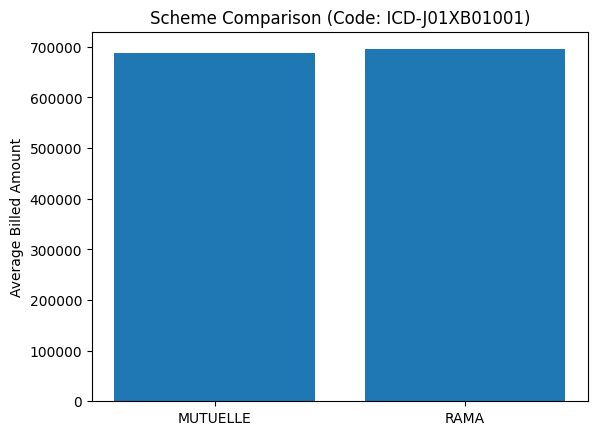

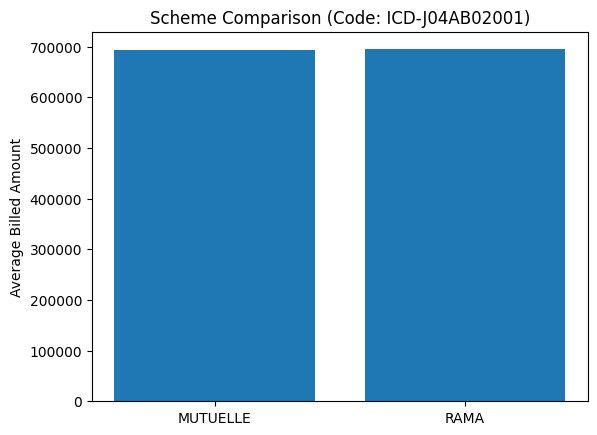

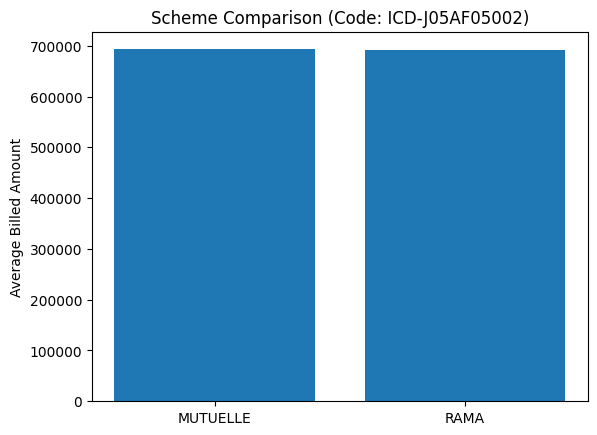

In [78]:
import matplotlib.pyplot as plt

def compare_schemes_top_codes(df1, df2, scheme_name1, scheme_name2, top_codes):
    """Compares cost between two schemes for a set of specified codes (multi-level index).

    Args:
        df1 (pandas.DataFrame): DataFrame for the first scheme.
        df2 (pandas.DataFrame): DataFrame for the second scheme.
        scheme_name1 (str): Name of the first scheme.
        scheme_name2 (str): Name of the second scheme.
        top_codes (list): List of shared diagnosis codes to compare.
    """

    for code in top_codes:
        try:
            scheme1_data = df1.loc[code]  
            scheme2_data = df2.loc[code] 
        except KeyError:
            print(f"Code '{code}' not found in both dataframes.")
            continue 

        stats1 = scheme1_data['billedAmount'].describe()
        stats2 = scheme2_data['billedAmount'].describe()

        # Create bar plot
        plt.bar([scheme_name1, scheme_name2], [stats1['mean'], stats2['mean']])
        plt.ylabel("Average Billed Amount")
        plt.title(f"Scheme Comparison (Code: {code})")
        plt.show()

# Example Usage: (Modify once you provide the top codes)
compare_schemes_top_codes(outliers_mutuelle, outliers_rama, 'MUTUELLE', 'RAMA', ['ICD-J01XB01001', 'ICD-J04AB02001', 'ICD-J05AF05002'])


Insight: "Cost analysis of outlier diagnoses across major insurance schemes reveals strikingly similar pricing structures. This finding, strongly suggests external regulation plays a dominant role in determining healthcare costs."

Recommendation: "While regulation aims to standardize care, it's worth investigating if it limits flexibility for cost-saving strategies in specific scenarios (e.g., the potential 'ICD-J01XB01001' difference)."

### Hypothesis Testing

* Null Hypothesis (H0): There is NO statistically significant difference in the average billed amount between the MUTUELLE and RAMA outlier data.

* Alternative Hypothesis (Ha): There IS a statistically significant difference in the average billed amount between the MUTUELLE and RAMA outlier data.


*** Let's find the histograms for billedAmount column for both the outliers_mutuelle and outliers_rama dataframes. This will determine if a t-test or Mann-Whitney U test is appropriate.

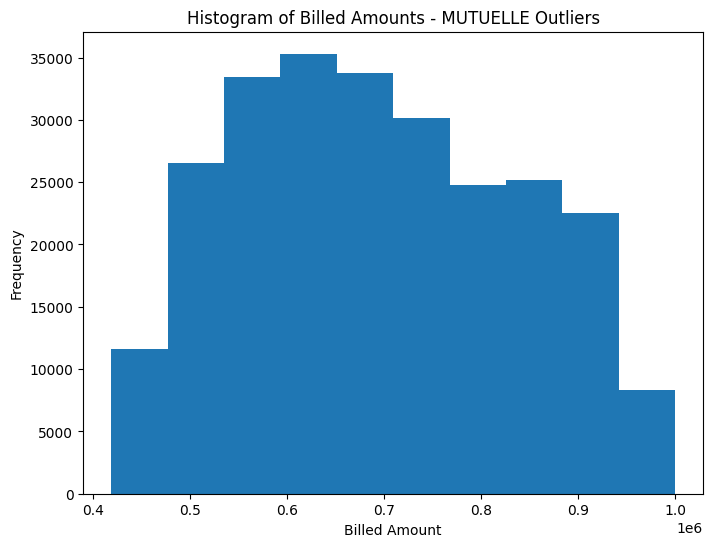

In [79]:
# Histogram for outliers_mutuelle
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.hist(outliers_mutuelle['billedAmount'])
plt.xlabel('Billed Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Billed Amounts - MUTUELLE Outliers')
plt.show()

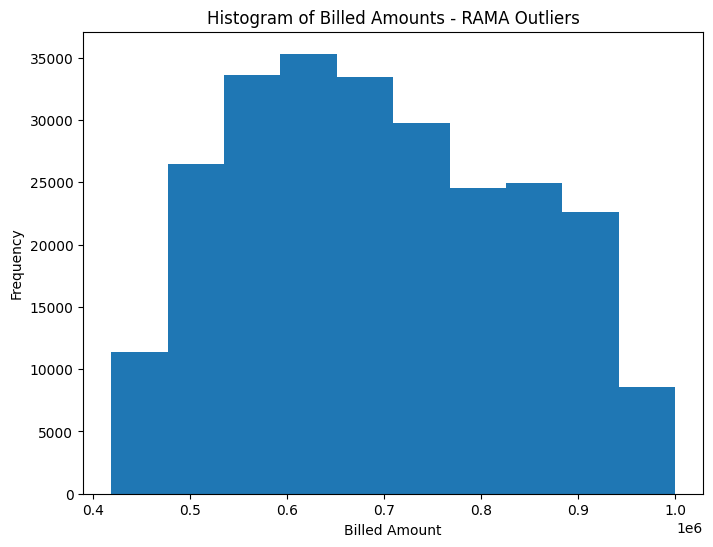

In [80]:
# Histogram for outliers_rama
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.hist(outliers_rama['billedAmount'])
plt.xlabel('Billed Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Billed Amounts - RAMA Outliers')
plt.show()

Here are some characteristics of the histogram:

1. The majority of the billed amounts fall on the left side of the graph, indicating that most outliers have billed amounts that are below a certain value.
2. There is a longer tail extending towards the right side of the graph, suggesting a few outliers with much higher billed amounts compared to the rest of the data.

* We are going to use **mannwhitneyu test**

In [81]:
from scipy.stats import mannwhitneyu

In [82]:
mutuelle_data = outliers_mutuelle['billedAmount']
rama_data = outliers_rama['billedAmount']

In [83]:
statistic, p_value = mannwhitneyu(mutuelle_data, rama_data)
print('Mann-Whitney U Statistic:', statistic)
print('P-value:', p_value)

Mann-Whitney U Statistic: 31510004390.0
P-value: 0.7707022295907345


High P-value (0.7707):  This p-value is much larger than our common significance level threshold (0.05).  We fail to reject the null hypothesis. This means we cannot conclude a statistically significant difference in the average billed amounts between the MUTUELLE and RAMA outlier data.

Supports Your Insight: The lack of statistical difference reinforces your earlier observation of strikingly similar pricing structures between the two schemes. This strengthens the argument that external regulation likely plays a significant role in influencing this similarity.

* Regulations might still be primary driver.

### Cost difference by location

In [84]:
# Merge data for location
outliers_with_location = outliers_combined.merge(demo[['id', 'location']], on='id', how='left')
outliers_with_location.head(2)

,id,createdAt,updatedAt,scheme,patientId,medicationCode,admissionDate,dischargeDate,medicationName,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount,firstName,lastName,gender,facilityName,location
0,8db6e123-4e51-4f69-bc26-3c24b387904b,2024-04-23 00:50:54.021515,2024-04-23 00:50:54.027349,RAMA,cb60720f-22d1-4b13-ac31-8da6db40d1cb,58120,2023-07-18 06:10:32.705,2024-01-19 09:46:48.025,X-RAY OF THE LUMBAR SPINE OBLIQUE [RIGHT & LEFT],ICD-J05AF10001,CPT-42242000FQZ381,97,862330,532617,329713,NaN,NaN,NaN,NaN,NaN
1,59e3c26f-05bd-431c-882c-23ac0f9533f7,2024-04-23 00:52:19.606624,2024-04-23 00:52:19.629878,MUTUELLE,341945dc-25ba-482a-874a-72a1bd127db1,40003,2024-03-14 19:56:14.138,2024-04-20 16:23:17.566,VENTRICULAR PERITONIUM SHUNT INSERTION,ICD-J01XB01002,CPT-42242000FQZ408,100,900500,853528,46972,NaN,NaN,NaN,NaN,NaN


In [85]:
outliers_with_location.isnull().sum()

id                     0
createdAt         251098
updatedAt         251098
scheme                 0
patientId         251098
medicationCode         0
admissionDate          0
dischargeDate          0
medicationName         0
diagnosisCode          0
procedureCode          0
quantity               0
billedAmount           0
verifiedAmount         0
paidAmount             0
firstName         251098
lastName          251098
gender            251098
facilityName      251098
location          251098
dtype: int64

The large number of outliers without location data could itself be a significant finding! It suggests that a substantial portion of high costs  may be driven by systemic factors rather than being tied to specific locations.

In [86]:
top_location_costs = outliers_with_location.groupby('location')['billedAmount'].mean().sort_values(ascending=False)
top_location_costs

location
Fort Rubye           996000.0
East Shirley         988500.0
New Richmondville    976570.0
Fort Anjalifort      975000.0
Christiansenview     974610.0
                       ...   
South Jasoncester    443205.0
Gregoryberg          442200.0
Kochburgh            439890.0
Dickihaven           424585.0
East Jocelynside     423360.0
Name: billedAmount, Length: 28021, dtype: float64

* We are going to calculate the percentage difference between the highest and lowest costs. A large percentage indicates significant variability, highlighting a strong need for location-specific strategies.

In [87]:
highest_cost = outliers_with_location.groupby('location')['billedAmount'].mean().max()
lowest_cost = outliers_with_location.groupby('location')['billedAmount'].mean().min()

percentage_difference = ((highest_cost - lowest_cost) / lowest_cost) * 100

print(f"Percentage Difference: {percentage_difference:.2f}%")

Percentage Difference: 135.26%


Location analysis revealed a high percentage difference of 135.26% in average billed  amounts between highest and lowest cost cities.The highest was 996000.0, and the lowest was 423360.0. This substantial variation highlights the need for  tailored cost reduction efforts, including:

1. Targeted Negotiations: Prioritize providers in Fort Rubye, East Shirley, and other high cost locations for review and potential negotiations.
2. Regional Investigations: Explore potential regulatory or socioeconomic factors contributing to higher costs in these regions.
3. Systemic Actions: The wide overall cost disparity reinforces the need for broader cost-control measures.

#### Put some of these locations in a new data frame for wasy access.

In [88]:
# create a data frame for higher billed locations
top_locations = ['Fort Rubye', 'East Shirley', 'New Richmondville', 
                 'Fort Anjalifort', 'Christiansenview', 'Port Dorothea',
                 'Bauchton', 'North Margarita', 'Peytonfort', 'Eldaview',
                 'New Fatimaworth', 'Lydafort', 'East Junior', 'Nadermouth',
                 'Brakusberg'] 

high_cost_outliers = outliers_with_location[outliers_with_location['location'].isin(top_locations)]

In [90]:
high_cost_outliers.head(2)

,id,createdAt,updatedAt,scheme,patientId,medicationCode,admissionDate,dischargeDate,medicationName,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount,firstName,lastName,gender,facilityName,location
252728,0a0984ae-5824-4ef3-a780-1cffb45099fb,NaN,NaN,RAMA,NaN,30391,2023-06-27 14:52:56.380,2023-10-11 20:17:49.622,LAPAROSCOPY DIAGNOSTIC/WITH BIOPSY,ICD-J05AG01002,CPT-42242000FQZ435,100,920500,371419,549081,Doug,Conn,FEMALE,Sonbrid,Peytonfort
252729,0a0984ae-5824-4ef3-a780-1cffb45099fb,NaN,NaN,MUTUELLE,NaN,J01FA01003,2023-11-03 04:43:50.955,2024-01-07 02:59:32.645,ERYTHROMYCIN 125MG/5ML POWDER FOR ORAL SUSPEN...,ICD-J02AC01002,CPT-42242000FQZ419,100,999500,586415,413085,Doug,Conn,FEMALE,Sonbrid,Peytonfort


We now have a new dataframe that can be accessed easily for locations with high costs.

# CONCLUSION:

* Outlier Costs Are the Focus: The analysis identified specific diagnosis codes (like ICD-J01XC01001) and procedures that drive exceptionally high healthcare costs.

* Cost Drivers Uncovered: Key factors contributing to inflated costs include:

1. Expensive Medications: Significant reliance on costly medications within highly priced cases.
2. Facility Cost Variation: Certain healthcare facilities consistently charge more than others.
3. Regional Disparities: Location plays a substantial role in cost, with some areas exhibiting significantly higher averages.

* Regulation: A Powerful Influence

1. Surprisingly Similar Pricing: Outlier costs between the MUTUELLE and RAMA insurance schemes are remarkably similar. This lack of statistical difference suggests a strong regulatory influence on healthcare costs in this region.
2. Regulation May Limit Flexibility: While standardization is beneficial, excessive regulation may prevent tailored, cost-saving approaches. It warrants further investigation into how current structures impact cost control.

* Location: A Critical Factor

1. Large Cost Disparities: Outlier costs can differ substantially across locations. The analysis revealed a 135.26% difference between the highest and lowest average costs!
2. Need for Targeted Strategies: High-cost locations (e.g., Fort Rubye, East Shirley, New Richmondville) demand focused strategies, including negotiation, regional investigations, and systemic interventions.

* Recommendations

1. Prioritize High-Impact Areas: Focus on the specific diagnoses, procedures, medications, and facilities that drive the majority of outlier costs. These are potential areas for significant savings.

2. Investigate Alternatives: Explore alternatives to the most expensive medications (e.g., generic options or medication changes where feasible).

3. Negotiations with Facilities: Engage in targeted discussions and negotiations with the highest-priced facilities to secure more favorable rates.

4. Regional Analyses: With access to more location data for easy grouping, analyze factors underlying cost differences between locations. This may uncover regional protocols or socioeconomic reasons that could be addressed for cost savings.

5. Review Regulatory Influence: Examine if current regulations unintentionally restrict the flexibility needed to implement cost-effective solutions, especially considering the similar pricing across schemes.

* Dataframes for Focused Action

1. outlier_meds, outlier_facilities, outlier_locations: These highlight the costliest medications, facilities, and locations.
2. high_cost_outliers: Isolates outliers in top-cost locations for immediate investigation.